In [1]:
# Dark theme for Jupyter Notebook
# install jupyterthemes
# !pip install jupyterthemes
#!jt -t onedork -cellw 98% -f roboto -T -tfs 12
#!jt -r

# # Project Description: Twitter US Airline Sentiment

### Objective
- To implement the techniques learnt as a part of the course. Classify weeds and crop.

### Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing: Bag of words; Tf-idf
- Build the classification model.
- Evaluate the Model.

### Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset Columins:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone


### Steps and tasks:
#### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
#### 2. Understand of data-columns: (5 Marks)

      a. Drop all other columns except “text” and “airline_sentiment”.
      b. Check the shape of data.
      c. Print first 5 rows of data.

#### 3. Text pre-processing: Data preparation. (20 Marks)

      a. Html tag removal.
      b. Tokenization.
      c. Remove the numbers.
      d. Removal of Special Characters and Punctuations.
      e. Conversion to lowercase.
      f. Lemmatize or stemming.
      g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
      h. Print first 5 rows of data after pre-processing.

#### 4. Vectorization: (10 Marks)

     a. Use CountVectorizer.
     b. Use TfidfVectorizer.

#### 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

#### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

### Problem Statement


- Natural Language Processing

### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [2]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuyet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuyet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yuyet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv("Tweets.csv")                         # Loading data into pandas dataframe
print(data.shape)                                        # print shape of data.
data.info()

(14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  ob

In [4]:
data.head()                                           # Chect first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Gather all Numerical Data Columns
List = data.columns.tolist()   
List

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

### 2. Understand of data-columns: (5 Marks)

      a. Drop all other columns except “text” and “airline_sentiment”.
      b. Check the shape of data.
      c. Print first 5 rows of data.

In [6]:
# a. Drop all other columns except “text” and “airline_sentiment”.
data0 = data.drop(['tweet_id',
  #'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
  #'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone'], axis=1)

# b. Check the shape of data.
print(data0.shape)
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

# c. Check the shape of data.
data0.head()                                 # Check first 5 rows of data

(14640, 2)


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


### 3. Text pre-processing: Data preparation. (20 Marks)

      a. Html tag removal.
      b. Tokenization.
      c. Remove the numbers.
      d. Removal of Special Characters and Punctuations.
      e. Conversion to lowercase.
      f. Lemmatize or stemming.
      g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
      h. Print first 5 rows of data after pre-processing.

In [7]:
# a. Html tag removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data0['text'] = data0['text'].apply(lambda x: strip_html(x))

#  Removal of the http link using Regular Expression.
for i, row in data0.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data0.at[i,'text'] = clean_text
    
data0

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


In [8]:
# replace contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in data0.iterrows():
    text = data0.at[i, 'text']
    clean_text = replace_contractions(text)
    data0.at[i,'text'] = clean_text
data0

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. that is called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??"


In [9]:
# d. Removal of Special Characters and numbers
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


data0['text'] = data0['text'].apply(lambda x: remove_special_characters(x))
data0

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,VirginAmerica and it is a really big bad thing about it
...,...,...
14635,positive,AmericanAir thank you we got on a different flight to Chicago
14636,negative,AmericanAir leaving over minutes Late Flight No warnings or communication until we were minutes Late Flight that is called shitty customer svc
14637,neutral,AmericanAir Please bring American Airlines to BlackBerry
14638,negative,AmericanAir you have my money you change my flight and do not answer your phones Any other suggestions so I can make my commitment


In [10]:
# c. Remove the numbers
# def remove_numbers(text):
#  text = re.sub(r'\d+', '', text)
#  return text
#
#data0['text'] = data0['text'].apply(lambda x: remove_numbers(x))
#data0

In [11]:
# Removal of Emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

data0['text'] = data0['text'].apply(lambda x: deEmojify(x))
data0

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,VirginAmerica and it is a really big bad thing about it
...,...,...
14635,positive,AmericanAir thank you we got on a different flight to Chicago
14636,negative,AmericanAir leaving over minutes Late Flight No warnings or communication until we were minutes Late Flight that is called shitty customer svc
14637,neutral,AmericanAir Please bring American Airlines to BlackBerry
14638,negative,AmericanAir you have my money you change my flight and do not answer your phones Any other suggestions so I can make my commitment


In [12]:
data0['text'] = data0.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data0

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
...,...,...
14635,positive,"[AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago]"
14636,negative,"[AmericanAir, leaving, over, minutes, Late, Flight, No, warnings, or, communication, until, we, were, minutes, Late, Flight, that, is, called, shitty, customer, svc]"
14637,neutral,"[AmericanAir, Please, bring, American, Airlines, to, BlackBerry]"
14638,negative,"[AmericanAir, you, have, my, money, you, change, my, flight, and, do, not, answer, your, phones, Any, other, suggestions, so, I, can, make, my, commitment]"


In [13]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [14]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data0['text'] = data0.apply(lambda row: normalize(row['text']), axis=1)

In [15]:
# Print
data1 = data0
data1.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse
4,negative,virginamerica really big bad thing


In [16]:
mapping_dict={'negative':1, 
               'neutral':2, 
               'positive':3}
data2 = data1.replace(mapping_dict)
data2.head()

,airline_sentiment,text
0,2,virginamerica dhepburn say
1,3,virginamerica plus add commercials experience tacky
2,2,virginamerica not today must mean need take another trip
3,1,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse
4,1,virginamerica really big bad thing


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  int64 
 1   text               14640 non-null  object
dtypes: int64(1), object(1)
memory usage: 228.9+ KB


### 4. Vectorization: (10 Marks)

     a. Use CountVectorizer.
     b. Use TfidfVectorizer.

In [18]:
# a. Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
    #max_features=1000)               
data_features = vectorizer.fit_transform(data2['text'])

data_features = data_features.toarray()                        # Convert the data features to array.
data_features.shape                                            # Show data shape

(14640, 11466)

In [19]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# b. TfidfVectorizer (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizertf = TfidfVectorizer()
    #max_features=1000)
data_featurestf = vectorizertf.fit_transform(data2['text'])

data_featurestf = data_featurestf.toarray()

data_featurestf.shape

(14640, 11466)

In [21]:
data_featurestf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

##### Count Vectorization

In [28]:
# a. Vectorization
labels = data2['airline_sentiment']

# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=7)

print("{0:0.2f}% data is in training set".format((len(X_train)/len(data2.index)) * 100))   
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data2.index)) * 100))

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

70.00% data is in training set
30.00% data is in test set
RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7172814207650273


In [29]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2510  184   90]
 [ 388  443   99]
 [ 201  113  364]]


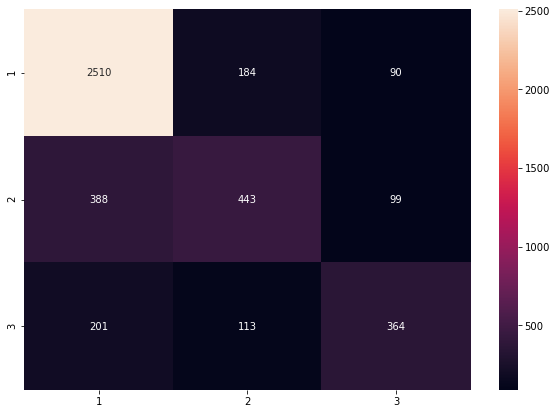

In [30]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

##### TfidfVectorizer

In [ ]:
labelstf = data2['airline_sentiment']

# Split data into training and testing set.

Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(data_featurestf, labelstf, test_size=0.3, random_state=7)

print("{0:0.2f}% data is in training set".format((len(Xtf_train)/len(data2.index)) * 100))   
print("{0:0.2f}% data is in test set".format((len(Xtf_test)/len(data2.index)) * 100))

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

foresttf = RandomForestClassifier(n_estimators=10, n_jobs=4)

foresttf = forest.fit(Xtf_train, ytf_train)

print(foresttf)

print(np.mean(cross_val_score(foresttf, data_featurestf, labelstf, cv=10)))

70.00% data is in training set
30.00% data is in test set
RandomForestClassifier(n_estimators=10, n_jobs=4)


In [26]:
# Predict the result for test data using the model built above.

resulttf = foresttf.predict(Xtf_test)

[[2609  124   51]
 [ 464  380   86]
 [ 245  100  333]]


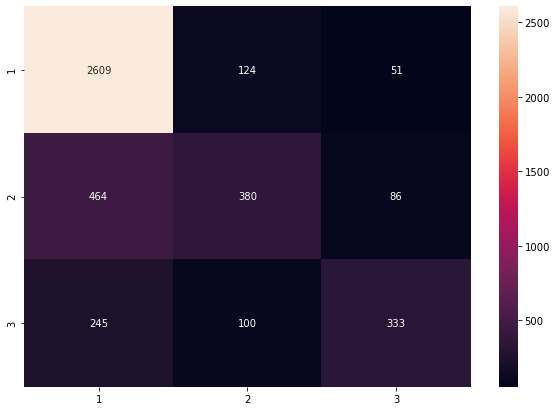

In [27]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mattf = confusion_matrix(ytf_test, resulttf)

print(conf_mattf)

df_cmtf = pd.DataFrame(conf_mattf, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cmtf, annot=True, fmt='g')

### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)


Summary:

- The objective of the project is to classify the twitter messages.
- We used Twitter dataset containing text message and their sentiment category in terms of negative, neutral and positive. 
- The data has been preprocessed, then We join the words in the list to convert back to text string in the dataframe. We were using different techniques and libraries, including
      a. Html tag removal (by using beautifulsoup library), 
      b. Removal of Special Characters and Punctuations, Removal the numbers, removal emojis (by using regular expression library)  
      c. conversion to lowercase. 
      d. Tokenization, lemmatize or stemming (using the ntlk library) 
- A label encoding has been utilized to convert the category to numerial values.The pre-precessed text message is converted to
numbers, so that we can feed the data in the model.
- We have performed vectorization based on count and Tf-idf methods.
      a. Count vectorization is based on the term frequencies occur in all documents.
      b. TF-IDF is reduce the impact of tokensthat occur very frequently, hence offering little to none in terms of information.
- We build classification models for both vectorization type using random forest method, trained model based on 70% training data. Then test the results on the 30% testing data
- In general, the classification results reach an accuracy above 70%. our model performed good in perspective of how the text classification models perform. However, the classification model trained using count vectorization is slightly better than the one using Tf-idf method.
- Based on the confusion matrix, we can see the dataset is not balanced. There are more negative reviews. The prediction accuracy of the neutral and positive comments are not very good.
- The ways to increase accuracy, such as: varying the sequencies of Pre-processing techniques, hyperparameter tuning, applying upsampling and downsampling techniques, etc.